In [11]:
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with open('Data/2015.tsv','r') as tsv:
    data = [line.strip().split('\t') for line in tsv]
    
col_names = data[0]
df = pd.DataFrame(data, columns=col_names)
df = df[1:]

#open code_sex.csv and convert it to a DataFrame
with open('Data/code_sex.csv','r') as csv:
    sex_descrip = [line.strip().split(',') for line in csv]

sex_header = sex_descrip[0]
df_sex = pd.DataFrame(sex_descrip, columns=sex_header)
df_sex = df_sex[1:]
indexed_df_sex = df_sex.set_index('Code')

#open code_body_part.csv and convert it to a DataFrame
with open('Data/code_body_part.csv','r') as csv:
    body_part_descrip = [line.strip().split(',') for line in csv]

body_part_header = body_part_descrip[0]
df_body_part = pd.DataFrame(body_part_descrip, columns=body_part_header)
df_body_part = df_body_part[1:]
indexed_df_body_part = df_body_part.set_index('Code')

#open code_diagnosis.csv and convert it to a DataFrame
with open('Data/code_diagnosis.csv','r') as csv:
    diagnosis_descrip = [line.strip().split(',') for line in csv]

diagnosis_header = diagnosis_descrip[0]
df_diagnosis = pd.DataFrame(diagnosis_descrip, columns=diagnosis_header)
df_diagnosis = df_diagnosis[1:]
indexed_df_diagnosis = df_diagnosis.set_index('Code')

#open code_disposition.csv and convert it to a DataFrame
with open('Data/code_disposition.csv','r') as csv:
    disposition_descrip = [line.strip().split(',') for line in csv]

disposition_header = disposition_descrip[0]
df_disposition = pd.DataFrame(disposition_descrip, columns=disposition_header)
df_disposition = df_disposition[1:]
indexed_df_disposition = df_disposition.set_index('Code')

#open code_fire.csv and convert it to a DataFrame
with open('Data/code_fire.csv','r') as csv:
    fire_descrip = [line.strip().split(',') for line in csv]

fire_header = fire_descrip[0]
df_fire = pd.DataFrame(fire_descrip, columns=fire_header)
df_fire = df_fire[1:]
indexed_df_fire = df_fire.set_index('Code')

#open code_locale.csv and convert it to a DataFrame
with open('Data/code_locale.csv','r') as csv:
    locale_descrip = [line.strip().split(',') for line in csv]

locale_header = locale_descrip[0]
df_locale = pd.DataFrame(locale_descrip, columns=locale_header)
df_locale = df_locale[1:]
indexed_df_locale = df_locale.set_index('Code')

#open code_product.csv and convert it to a DataFrame
with open('Data/code_product.csv','r') as csv:
    product_descrip = [line.strip().split(',',1) for line in csv]

product_header = product_descrip[0]
df_product = pd.DataFrame(product_descrip, columns=product_header)
df_product = df_product[1:]
indexed_df_product = df_product.set_index('Code')

#open code_race.csv and convert it to a DataFrame
with open('Data/code_race.csv','r') as csv:
    race_descrip = [line.strip().split(',') for line in csv]

race_header = race_descrip[0]
df_race = pd.DataFrame(race_descrip, columns=race_header)
df_race = df_race[1:]
indexed_df_race = df_race.set_index('Code')

#merge all the codes
df['sex_descrip']=df.sex.map(indexed_df_sex.Description)
df['body_part_descrip']=df.body_part.map(indexed_df_body_part.Description)
df['diag_descrip']=df.diag.map(indexed_df_diagnosis.Description)
df['disposition_descrip']=df.disposition.map(indexed_df_disposition.Description)
df['fire_descrip']=df.fmv.map(indexed_df_fire.Description)
df['locale_descrip']=df.location.map(indexed_df_locale.Description)
df['product1_descrip']=df.prod1.map(indexed_df_product.Description)
df['product2_descrip']=df.prod2.map(indexed_df_product.Description)
df['race_descrip']=df.race.map(indexed_df_race.Description)

#combine the 2 narr fields into 1
df['Notes'] = df['narr1'].map(str) + df['narr2'].map(str)

df1 = df[['CPSC Case #', 
         'trmt_date', 
         'psu', 
         'weight', 
         'age', 
         'sex_descrip', 
         'race_descrip',
         'body_part_descrip', 
         'diag_descrip', 
         'disposition_descrip', 
         'fire_descrip', 
         'locale_descrip', 
         'product1_descrip', 
         'product2_descrip', 
         'Notes']]

        Dates  Number_injuries
0  01/01/2015              862
1  01/02/2015              838
2  01/03/2015              828
3  01/04/2015              838
4  01/05/2015              847
5  01/06/2015              839
6  01/07/2015              792
7  01/08/2015              849
8  01/09/2015              855
9  01/10/2015              876


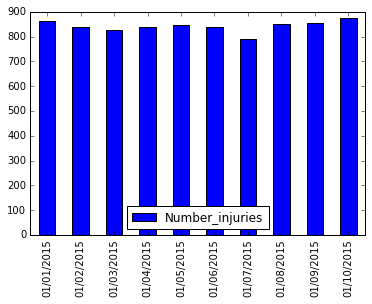

In [42]:
# Time associated 
#dates = pd.date_range('1/1/2015', '12/31/2015', freq = 'M')

time_count = df1['trmt_date'].value_counts().sort_index()

dftime = pd.DataFrame({'Dates':time_count.index, 'Number_injuries':time_count.values}).head(10)
print(dftime)

graph = dftime.head(10).plot(kind = 'bar')
graph.set_xticklabels(dftime['Dates'].head(10))


In [ ]:
# Looking for weight associated injuries

weight = df1['weight'].value_counts().sort_index(ascending = False).head(10)

# Heaviest to lighter weights
weight_1 = df1[df1['weight'].str.contains('97.9239')]
dfweight1 = weight_1['product1_descrip'].value_counts().head()

weight_2 = df1[df1['weight'].str.contains('85.7374')]
dfweight2 = weight_2['product1_descrip'].value_counts().head()

weight_3 = df1[df1['weight'].str.contains('83.2157')]
dfweight3 = weight_3['product1_descrip'].value_counts().head()

weight_4 = df1[df1['weight'].str.contains('80.8381')]
dfweight4 = weight_4['product1_descrip'].value_counts().head()

weight_5 = df1[df1['weight'].str.contains('78.5926')]
dfweight5 = weight_5['product1_descrip'].value_counts().head()

weight_6 = df1[df1['weight'].str.contains('74.8813')]
dfweight6 = weight_6['product1_descrip'].value_counts().head()

weight_7 = df1[df1['weight'].str.contains('49.2646')]
dfweight7 = weight_7['product1_descrip'].value_counts().head()

weight_7 = df1[df1['weight'].str.contains('37.6645 ')]
dfweight8 = weight_7['product1_descrip'].value_counts().head()

weight_graph = pd.DataFrame({'97lbs':dfweight1, '85lbs':dfweight2, '83lbs':dfweight3, '80lbs':dfweight4, '78lbs':dfweight5, '75lbs':dfweight6, '49lbs':dfweight7, '37lbs':dfweight8}).plot(kind = 'bar', stacked = True)

In [ ]:
# drunk vs high vs under the influence

# Search for drunk in notes
drunk_af = df1[df1['Notes'].str.contains('DRUNK|DRINKING|ALCOHOL|INEBRIATED')]
drunk_af_graph = drunk_af['age'].value_counts().head(10).plot(kind = 'bar')
drunk_af_graph.set_xlabel("Ages")
drunk_af_graph.set_ylabel("Number of people")


In [ ]:
# Search for high in notes (remove references to high with other phrases)

high_filter = df1[df1['Notes'].str.contains('HIGH')]

high_filter = high_filter[high_filter['Notes'].str.contains('HEELED') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('CHAIR') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('HEELS') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('THIGH') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('BED') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('BAR') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('SHELF') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('HEEL') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('STEPS') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('POWERED') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('STOOL') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('FT') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('FEET') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('UP') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('INTENSITY') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('HEEL') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('SCHOOL') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('SPEED') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('PRESSURE') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('CABINET') == False]
high_filter = high_filter[high_filter['Notes'].str.contains('JUMP') == False]
high_af = high_filter[high_filter['Notes'].str.contains('TOP') == False]


pd.options.display.max_colwidth = 1000
high_af['Notes']

# high_af_graph = high_af['age'].value_counts().head(10).plot(kind = 'bar')
# high_af_graph.set_xlabel("Ages")
# high_af_graph.set_ylabel("Number of people")

In [ ]:
# Girls v Boys
# General injuries 

gvb_general = df1['sex_descrip'].value_counts().plot(kind = "bar")
gvb_general = gvb_general.set_ylabel("Number of injuries")
gvb_general

In [ ]:
# Girls v Boys
# Most common products
    
gvb_products = df1['product1_descrip'].value_counts().head(10).plot(kind = 'bar', legend=None, title = "The most dangerous products for males vs females")
gvb_products.set_xlabel("Product types")
gvb_products.set_ylabel("Frequency of occurences")
gvb_products

# Trying to groupby sex, then 10 most common things for each sex
y = df1.groupby(['sex_descrip', 'product1_descrip'], sort = True).size()

In [17]:
# Girls v Boys
# Most common products
# 10 most common items, need to break by gender
ten_products = df1['product1_descrip'].value_counts(ascending = False)
ten_products
#ten_products = ten_products.head(10).plot.bar(by = 'product1_descrip')


STAIRS OR STEPS                                                   28712
FLOORS OR FLOORING MATERIALS                                      28351
"BEDS OR BEDFRAMES, OTHER OR NOT SPEC    "                        16784
"BASKETBALL, ACTIVITY AND RELATED EQUIPMENT"                      14147
"BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN OR ALL-TERRAIN)"        12787
"FOOTBALL (ACTIVITY, APPAREL OR EQUIPMENT)"                       11664
"CHAIRS, OTHER OR NOT SPECIFIED          "                         8271
CEILINGS AND WALLS (PART OF COMPLETED STRUCTURE)                   7783
"DOORS, OTHER OR NOT SPECIFIED           "                         7723
"TABLES (EXCL.  BABY CHANGING TABLES, BILLIARD OR POOL TABLES"     7354
"KNIVES, NOT ELSEWHERE CLASSIFIED"                                 7320
BATHTUBS OR SHOWERS                                                7209
"SOCCER (ACTIVITY, APPAREL OR EQUIPMENT)"                          7173
"EXERCISE (ACTIVITY OR APPAREL, W/O EQUIP)"                     

In [ ]:
# Girls v Boys
# Most commonly injured body part
# Need to change to gvb

body_parts = df1['body_part_descrip'].value_counts().plot(kind = 'bar')
body_parts